In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
def isNaN(num):
    return num != num

In [3]:
df_regions = pd.read_csv('regions.csv')
df_weather = pd.read_csv('all_weather_by_hour_2023-2025_v1.csv', sep=",")
df_alarms = pd.read_csv('alarms-240222-010325.csv', sep=";")
df_isw_tfidf = pd.read_csv('bigram_tfidf_matrix.csv', sep=",")

In [4]:
df_pca = pd.read_csv('pca_tfidf_result.csv', sep=",")

## regions preparing

In [5]:
df_regions.head(5)

,region,center_city_ua,center_city_en,region_alt,region_id
0,АР Крим,Сімферополь,Simferopol,Крим,1
1,Вінницька,Вінниця,Vinnytsia,Вінниччина,2
2,Волинська,Луцьк,Lutsk,Волинь,3
3,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4
4,Донецька,Донецьк,Donetsk,Донеччина,5


In [6]:
# add Kyiv with id=26 to df_regions
kyiv_row = pd.DataFrame([{'region': 'Київ', 'center_city_ua': 'Київ', 'center_city_en': 'Kyiv', 'region_alt': 'Київ', 'region_id': 26}])
df_regions = pd.concat([df_regions, kyiv_row], ignore_index=True)

In [7]:
df_regions

,region,center_city_ua,center_city_en,region_alt,region_id
0,АР Крим,Сімферополь,Simferopol,Крим,1
1,Вінницька,Вінниця,Vinnytsia,Вінниччина,2
2,Волинська,Луцьк,Lutsk,Волинь,3
3,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4
4,Донецька,Донецьк,Donetsk,Донеччина,5
5,Житомирська,Житомир,Zhytomyr,Житомирщина,6
6,Закарпатська,Ужгород,Uzhgorod,Закарпаття,7
7,Запорізька,Запоріжжя,Zaporozhye,Запоріжжя,8
8,Івано-Франківська,Івано-Франківськ,Ivano-Frankivsk,Івано-Франківщина,9
9,Київська,Київ,Kyiv,Київщина,10


## alarms

In [8]:
df_alarms.head(5)

,id,region_id,region_city,all_region,start,end
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19


In [9]:
# changing region_id in df_alarms according to region_id in df_regions
df_alarms['region_clean'] = df_alarms['region_city'].str.replace(' обл.', '', regex=False).str.strip()

region_mapping = dict(zip(df_regions['region'], df_regions['region_id']))

region_mapping_alt = dict(zip(df_regions['region_alt'], df_regions['region_id']))

full_mapping = {**region_mapping, **region_mapping_alt}

df_alarms['new_region_id'] = df_alarms['region_clean'].map(full_mapping)

In [10]:
df_alarms_unique = df_alarms.drop_duplicates(subset='new_region_id')
df_alarms_unique

,id,region_id,region_city,all_region,start,end,region_clean,new_region_id
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28,Львівська,13
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43,Чернігівська,25
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42,Вінницька,2
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47,Харківська,20
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19,Тернопільська,19
9,72852,9,Київ,0,2022-02-25 07:19:04,2022-02-25 07:49:04,Київ,26
12,52555,16,Рівненська обл.,1,2022-02-25 11:50:53,2022-02-25 12:26:46,Рівненська,17
19,53091,22,Черкаська обл.,1,2022-02-25 18:54:07,2022-02-25 21:24:04,Черкаська,23
20,52554,14,Одеська обл.,1,2022-02-25 19:38:58,2022-02-25 20:30:58,Одеська,15
21,52427,8,Запорізька обл.,1,2022-02-25 20:13:06,2022-02-26 09:36:06,Запорізька,8


In [11]:
# we can see that there is no data for Luhansk (new_region_id=12)

In [12]:
df_alarms.isna().sum()

id               0
region_id        0
region_city      0
all_region       0
start            0
end              0
region_clean     0
new_region_id    0
dtype: int64

In [13]:
df_alarms["start_time"] = pd.to_datetime(df_alarms["start"])
df_alarms["end_time"] = pd.to_datetime(df_alarms["end"])

In [14]:
df_alarms["start_hour"] = df_alarms['start_time'].dt.floor('H')
df_alarms["end_hour"] = df_alarms['end_time'].dt.ceil('H')

/var/folders/v9/1s1m0gfd7pj_mh9x13f5hvdc0000gn/T/ipykernel_8920/3661452492.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_alarms["start_hour"] = df_alarms['start_time'].dt.floor('H')
/var/folders/v9/1s1m0gfd7pj_mh9x13f5hvdc0000gn/T/ipykernel_8920/3661452492.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_alarms["end_hour"] = df_alarms['end_time'].dt.ceil('H')


In [15]:
df_alarms["day_date"] = df_alarms["start_time"].dt.date

df_alarms["start_hour_datetimeEpoch"] = df_alarms['start_hour'].apply(lambda x: int(x.strftime('%s'))  if not isNaN(x) else None)
df_alarms["end_hour_datetimeEpoch"] = df_alarms['end_hour'].apply(lambda x: int(x.strftime('%s'))  if not isNaN(x) else None)

In [16]:
df_alarms.sample(7)

,id,region_id,region_city,all_region,start,end,region_clean,new_region_id,start_time,end_time,start_hour,end_hour,day_date,start_hour_datetimeEpoch,end_hour_datetimeEpoch
25645,114468,2,Волинська обл.,1,2023-09-18 05:13:20,2023-09-18 06:02:54,Волинська,3,2023-09-18 05:13:20,2023-09-18 06:02:54,2023-09-18 05:00:00,2023-09-18 07:00:00,2023-09-18,1695002400,1695009600
34009,134582,13,Миколаївська обл.,1,2024-02-28 04:42:29,2024-02-28 05:21:44,Миколаївська,14,2024-02-28 04:42:29,2024-02-28 05:21:44,2024-02-28 04:00:00,2024-02-28 06:00:00,2024-02-28,1709085600,1709092800
7994,68239,19,Харківська обл.,1,2022-07-28 21:43:16,2022-07-28 22:19:20,Харківська,20,2022-07-28 21:43:16,2022-07-28 22:19:20,2022-07-28 21:00:00,2022-07-28 23:00:00,2022-07-28,1659031200,1659038400
2359,59842,8,Запорізька обл.,1,2022-04-05 22:33:37,2022-04-05 23:52:46,Запорізька,8,2022-04-05 22:33:37,2022-04-05 23:52:46,2022-04-05 22:00:00,2022-04-06 00:00:00,2022-04-05,1649185200,1649192400
11313,60649,8,Запорізька обл.,1,2022-10-03 07:25:21,2022-10-03 08:16:38,Запорізька,8,2022-10-03 07:25:21,2022-10-03 08:16:38,2022-10-03 07:00:00,2022-10-03 09:00:00,2022-10-03,1664769600,1664776800
52331,154640,4,Дніпропетровська обл.,1,2024-12-25 00:59:18,2024-12-25 08:31:15,Дніпропетровська,4,2024-12-25 00:59:18,2024-12-25 08:31:15,2024-12-25 00:00:00,2024-12-25 09:00:00,2024-12-25,1735077600,1735110000
53286,155667,20,Херсонська обл.,1,2025-01-12 18:02:36,2025-01-12 19:49:49,Херсонська,21,2025-01-12 18:02:36,2025-01-12 19:49:49,2025-01-12 18:00:00,2025-01-12 20:00:00,2025-01-12,1736697600,1736704800


In [17]:
df_alarms.shape

(55788, 15)

In [18]:
df_alarms.drop(['region_id','region_city', 'region_clean','start', 'end'], axis=1, inplace=True)

In [19]:
df_alarms['region_id'] = df_alarms['new_region_id']
df_alarms.drop(['new_region_id'], axis=1, inplace=True)

In [20]:
df_alarms.sample(7)

,id,all_region,start_time,end_time,start_hour,end_hour,day_date,start_hour_datetimeEpoch,end_hour_datetimeEpoch,region_id
46553,148469,1,2024-09-07 09:37:41,2024-09-07 10:05:06,2024-09-07 09:00:00,2024-09-07 11:00:00,2024-09-07,1725688800,1725696000,11
2421,56010,1,2022-04-07 05:04:56,2022-04-07 05:26:19,2022-04-07 05:00:00,2022-04-07 06:00:00,2022-04-07,1649296800,1649300400,4
29971,129902,1,2023-12-15 19:35:14,2023-12-15 20:08:10,2023-12-15 19:00:00,2023-12-15 21:00:00,2023-12-15,1702659600,1702666800,4
54453,157072,1,2025-02-05 12:50:36,2025-02-05 13:28:14,2025-02-05 12:00:00,2025-02-05 14:00:00,2025-02-05,1738749600,1738756800,11
34728,135415,1,2024-03-11 12:25:07,2024-03-11 13:07:33,2024-03-11 12:00:00,2024-03-11 14:00:00,2024-03-11,1710151200,1710158400,21
4165,69825,1,2022-05-07 13:51:48,2022-05-07 15:39:41,2022-05-07 13:00:00,2022-05-07 16:00:00,2022-05-07,1651917600,1651928400,22
34626,135229,1,2024-03-09 23:37:41,2024-03-10 00:07:57,2024-03-09 23:00:00,2024-03-10 01:00:00,2024-03-09,1710018000,1710025200,16


## weather preparing


In [21]:
df_weather.head(5)

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1020.0,0.0,91.5,0.0,NaN,0.0,Overcast,snow,obs,remote
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.2,88.2,0.0,NaN,0.0,Partially cloudy,fog,obs,remote
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1022.0,10.0,100.0,NaN,NaN,NaN,Overcast,cloudy,obs,33177099999
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.1,92.0,0.0,NaN,0.0,Overcast,fog,obs,remote
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.0,93.8,0.0,NaN,0.0,Overcast,cloudy,obs,remote


In [22]:
df_weather["day_datetime"] = pd.to_datetime(df_weather["day_datetime"])
df_weather.columns

Index(['city_latitude', 'city_longitude', 'city_resolvedAddress',
       'city_address', 'city_timezone', 'city_tzoffset', 'day_datetime',
       'day_datetimeEpoch', 'day_tempmax', 'day_tempmin', 'day_temp',
       'day_feelslikemax', 'day_feelslikemin', 'day_feelslike', 'day_dew',
       'day_humidity', 'day_precip', 'day_precipprob', 'day_precipcover',
       'day_snow', 'day_snowdepth', 'day_windgust', 'day_windspeed',
       'day_winddir', 'day_pressure', 'day_cloudcover', 'day_visibility',
       'day_solarradiation', 'day_solarenergy', 'day_uvindex', 'day_sunrise',
       'day_sunriseEpoch', 'day_sunset', 'day_sunsetEpoch', 'day_moonphase',
       'day_conditions', 'day_description', 'day_icon', 'day_source',
       'day_preciptype', 'day_stations', 'hour_datetime', 'hour_datetimeEpoch',
       'hour_temp', 'hour_feelslike', 'hour_humidity', 'hour_dew',
       'hour_precip', 'hour_precipprob', 'hour_snow', 'hour_snowdepth',
       'hour_preciptype', 'hour_windgust', 'hour_windsp

In [23]:
weather_exclude = ['city_latitude', 'city_longitude',
       'city_address', 'city_timezone', 
       'city_tzoffset', 'day_temp',
       'day_feelslikemax', 'day_feelslikemin', 
       'day_feelslike', 'day_precipprob', 
       'day_precipcover', 'day_snow', 
       'day_snowdepth', 'day_windgust',
       'day_winddir', 'day_solarradiation', 
       'day_uvindex', 'day_sunrise',
       'day_sunriseEpoch', 'day_sunset', 
       'day_sunsetEpoch', 'day_conditions', 
       'day_description', 'day_icon', 
       'day_source', 'day_preciptype', 
       'day_stations', 'hour_feelslike',
       'hour_precipprob','hour_preciptype',
       'hour_uvindex', 'hour_conditions', 
       'hour_icon', 'hour_source', 
       'hour_stations']

In [24]:
df_weather.drop(weather_exclude, axis=1, errors = 'ignore', inplace=True)

In [25]:
df_weather.sample(7)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,...,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy
400236,"Ужгород, Ужгородський район, Україна",2024-08-25,1724533200,34.3,13.9,14.7,62.9,0.0,7.8,1015.4,...,0.0,0.0,19.8,6.3,179.4,1015.4,37.7,43.0,728.5,2.6
477380,"Житомир, Україна",2025-01-02,1735768800,10.5,4.4,-2.3,52.6,0.0,27.4,1009.5,...,0.0,0.0,41.4,14.4,250.0,1006.7,10.0,80.0,0.0,0.0
256973,"Херсон, Україна",2023-01-31,1675116000,1.8,-1.3,-1.5,88.6,0.2,14.4,1009.0,...,0.0,1.3,10.1,10.8,140.0,1008.0,NaN,82.9,0.0,0.0
216129,"Чернігів, Україна",2024-10-03,1727902800,22.7,5.1,5.0,57.5,0.0,18.0,1014.0,...,0.0,0.0,25.6,14.0,146.8,1014.0,NaN,100.0,144.9,0.5
370893,"Запоріжжя, Україна",2023-05-31,1685480400,20.9,15.1,13.8,80.0,5.0,18.0,1012.9,...,0.0,0.0,6.5,4.3,29.1,1013.0,NaN,96.4,0.0,0.0
33577,"Херсон, Україна",2022-05-10,1652130000,18.2,6.1,1.7,45.7,0.0,18.7,1021.3,...,0.0,0.0,25.9,16.2,23.6,1021.0,24.1,91.6,0.0,NaN
604473,"Полтава, Україна",2024-09-23,1727038800,26.3,11.7,6.6,48.2,0.0,14.4,1018.0,...,0.0,0.0,27.7,13.3,70.5,1019.0,NaN,20.2,387.6,1.4


In [26]:
city_to_region_id = dict(zip(df_regions['center_city_ua'], df_regions['region_id']))

df_weather['city_clean'] = df_weather['city_resolvedAddress'].str.split(',').str[0].str.strip()
df_weather['city_clean'] = df_weather['city_clean'].replace('Хмельницька область', 'Хмельницький')
df_weather['region_id'] = df_weather['city_clean'].map(city_to_region_id)

In [27]:
df_weather.sample(7)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,...,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,city_clean,region_id
492596,"Рівне, Україна",2024-08-18,1723928400,31.6,16.5,16.5,66.8,0.0,12.6,1010.1,...,11.2,7.1,80.0,1008.4,10.0,30.0,3.9,0.0,Рівне,17
466306,"Житомир, Україна",2023-09-29,1695934800,26.3,9.2,9.0,64.7,0.0,10.8,1024.1,...,13.7,3.6,117.4,1025.0,NaN,0.0,435.6,1.6,Житомир,6
201584,"Чернігів, Україна",2023-02-05,1675548000,-0.5,-3.6,-4.4,84.6,1.7,19.1,1025.5,...,26.6,10.8,340.0,1023.7,2.0,100.0,3.7,0.0,Чернігів,25
210466,"Чернігів, Україна",2024-02-10,1707516000,0.0,-2.9,-2.8,90.2,7.0,23.4,1008.7,...,46.1,23.4,113.2,1009.0,NaN,100.0,79.9,0.3,Чернігів,25
579476,"Львів, Україна",2023-12-27,1703628000,7.1,-2.1,-0.3,73.4,0.3,32.0,1019.7,...,31.0,0.0,267.3,1025.6,10.0,30.0,0.0,0.0,Львів,13
570248,"Вінниця, Україна",2025-01-17,1737064800,2.1,0.1,-0.7,88.2,0.3,21.6,1031.2,...,34.6,10.8,310.0,1031.4,10.0,100.0,0.0,0.0,Вінниця,2
333337,"Хмельницька область, Україна",2023-05-09,1683579600,13.0,1.9,-1.0,54.2,0.0,17.3,1027.8,...,15.8,8.6,34.8,1029.0,NaN,18.0,0.0,0.0,Хмельницький,22


In [28]:
df_weather_unique = df_weather.drop_duplicates(subset='region_id')
df_weather_unique

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,...,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,city_clean,region_id
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,0.0,83.7,0.118,15.5,1022.3,...,31.3,15.5,275.6,1020.0,0.0,91.5,0.0,NaN,Луцьк,3
7944,"Кропивницький, Україна",2022-02-24,1645653600,6.2,-1.3,-1.2,78.9,0.000,10.8,1023.1,...,4.3,2.9,183.0,1021.0,24.1,56.2,0.0,NaN,Кропивницький,11
15888,"Дніпро, Україна",2022-02-24,1645653600,8.0,-2.0,-2.2,70.6,0.000,21.6,1021.9,...,9.7,10.8,4.0,1019.0,10.0,14.1,0.0,NaN,Дніпро,4
23832,"Київ, Україна",2022-02-24,1645653600,5.3,1.9,1.2,88.9,0.100,14.2,1021.9,...,28.8,7.4,217.0,1017.9,9.9,99.3,0.0,NaN,Київ,26
31776,"Херсон, Україна",2022-02-24,1645653600,9.8,0.0,-1.0,65.8,0.000,18.4,1021.5,...,11.2,7.6,29.4,1020.0,24.1,100.0,0.0,NaN,Херсон,21
39720,"Чернівці, Україна",2022-02-24,1645653600,6.5,-0.2,-0.8,74.9,0.008,17.9,1024.3,...,28.8,14.4,297.0,1023.3,10.0,30.0,0.0,NaN,Чернівці,24
47664,"Чернігів, Україна",2022-02-24,1645653600,5.2,0.3,-0.1,83.8,0.300,7.2,1022.8,...,12.6,7.2,181.5,1019.0,24.1,98.5,0.0,NaN,Чернігів,25
55608,"Одеса, Україна",2022-02-24,1645653600,9.0,1.0,0.8,74.0,0.000,21.6,1021.6,...,5.8,0.0,0.0,1019.0,10.0,93.7,0.0,NaN,Одеса,15
63552,"Миколаїв, Україна",2022-02-24,1645653600,8.8,0.0,-0.9,68.3,0.000,14.4,1021.8,...,6.8,3.2,129.8,1020.0,24.1,73.9,0.0,NaN,Миколаїв,14
71496,"Харків, Україна",2022-02-24,1645653600,5.0,-4.0,-4.7,70.0,0.000,18.0,1022.6,...,4.3,3.6,9.0,1019.0,6.0,1.5,0.0,NaN,Харків,20


In [29]:
# no Crimea and Luhansk

In [30]:
df_weather.drop(['city_resolvedAddress', 'city_clean'], axis=1, inplace=True)

In [31]:
nan_counts = df_weather.isna().sum()
print(nan_counts[nan_counts > 0].sort_values(ascending=False))

hour_visibility        276458
hour_solarenergy        87262
day_visibility          55352
hour_solarradiation      4336
day_solarenergy           552
hour_precip               102
dtype: int64


In [32]:
columns_to_check = [
    'hour_visibility',
    'hour_solarenergy', 
    'day_visibility', 
    'hour_solarradiation', 
    'day_solarenergy',
    'hour_precip',
    'hour_precip'
]

def fill_daily(group):
    for col in columns_to_check:
        if group[col].dtype in ['float64', 'int64']:
            mean_value = group[col].mean()
            group[col] = group[col].fillna(mean_value)
    return group

df_weather_cleaned = df_weather.groupby('day_datetime').apply(fill_daily)

for col in columns_to_check:
    if df_weather_cleaned[col].isna().any():
        df_weather_cleaned[col] = df_weather_cleaned[col].fillna(df_weather_cleaned[col].mean())

/var/folders/v9/1s1m0gfd7pj_mh9x13f5hvdc0000gn/T/ipykernel_8920/1799283526.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_weather_cleaned = df_weather.groupby('day_datetime').apply(fill_daily)


In [33]:
nan_counts = df_weather_cleaned.isna().sum()
print(nan_counts[nan_counts > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [34]:
df_weather = df_weather_cleaned

In [35]:
df_weather_unique = df_weather.drop_duplicates(subset='region_id')
df_weather_unique

day_datetime  day_datetimeEpoch  day_tempmax  day_tempmin  \
day_datetime                                                                    
2022-02-24   0        2022-02-24         1645653600          4.9          0.7   
             7944     2022-02-24         1645653600          6.2         -1.3   
             15888    2022-02-24         1645653600          8.0         -2.0   
             23832    2022-02-24         1645653600          5.3          1.9   
             31776    2022-02-24         1645653600          9.8          0.0   
             39720    2022-02-24         1645653600          6.5         -0.2   
             47664    2022-02-24         1645653600          5.2          0.3   
             55608    2022-02-24         1645653600          9.0          1.0   
             63552    2022-02-24         1645653600          8.8          0.0   
             71496    2022-02-24         1645653600          5.0         -4.0   
             79440    2022-02-24         1645653600          4.7          0.2   
             87384    2022-02-24         1645653600          5.6          1.9   
             95328    2022-02-24         1645653600          6.7         -2.4   
             103272   2022-02-24         1645653600          8.0         -2.0   
             111216   2022-02-24         1645653600          4.7          0.8   
             119160   2022-02-24         1645653600          5.5          1.5   
             127104   2022-02-24         1645653600          3.8         -0.2   
             135048   2022-02-24         1645653600          5.7         -2.7   
             142992   2022-02-24         1645653600          6.0          0.0   
             150936   2022-02-24         1645653600          5.7          0.1   
             158880   2022-02-24         1645653600          4.9         -0.1   
             166824   2022-02-24         1645653600          5.3         -3.8   
             174768   2022-02-24         1645653600          5.0          0.7   

                     day_dew  day_humidity  day_precip  day_windspeed  \
day_datetime                                                            
2022-02-24   0           0.0          83.7       0.118           15.5   
             7944       -1.2          78.9       0.000           10.8   
             15888      -2.2          70.6       0.000           21.6   
             23832       1.2          88.9       0.100           14.2   
             31776      -1.0          65.8       0.000           18.4   
             39720      -0.8          74.9       0.008           17.9   
             47664      -0.1          83.8       0.300            7.2   
             55608       0.8          74.0       0.000           21.6   
             63552      -0.9          68.3       0.000           14.4   
             71496      -4.7          70.0       0.000           18.0   
             79440      -0.4          83.0       0.500           14.4   
             87384       0.7          81.0       1.300           14.4   
             95328      -1.6          79.9       0.000           14.1   
             103272     -2.1          69.5       0.000           21.6   
             111216      0.3          85.6       0.214           14.3   
             119160      0.2          80.8       0.800           10.8   
             127104     -1.0          83.8       2.000           18.0   
             135048     -3.6          71.9       0.000           10.8   
             142992     -1.0          76.8       0.400           14.4   
             150936     -1.4          75.2       0.800           15.1   
             158880     -0.6          83.4       0.000            8.3   
             166824     -4.7          69.9       0.000            7.9   
             174768     -0.3          80.5       0.300           10.8   

                     day_pressure  day_cloudcover  ...  hour_snowdepth  \
day_datetime                                       ...                   
2022-02-24   0      

In [36]:
# as we have different id's for Kiyv and Kyiv region we need to copy data from Kyiv to Kyiv region
replacement = df_weather[df_weather['region_id'] == 26].copy()
replacement['region_id'] = 10

df_weather = df_weather[df_weather['region_id'] != 10]

df_weather = pd.concat([df_weather, replacement], ignore_index=True)

In [37]:
df_weather_unique = df_weather.drop_duplicates(subset='region_id')
df_weather_unique

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id
0,2022-02-24,1645653600,4.9,0.7,0.0,83.7,0.118,15.5,1022.3,72.3,...,0.2,31.3,15.5,275.6,1020.0,0.0,91.5,0.0,0.595973,3
24,2022-02-24,1645653600,6.2,-1.3,-1.2,78.9,0.000,10.8,1023.1,85.2,...,0.0,4.3,2.9,183.0,1021.0,24.1,56.2,0.0,0.595973,11
48,2022-02-24,1645653600,8.0,-2.0,-2.2,70.6,0.000,21.6,1021.9,53.6,...,0.0,9.7,10.8,4.0,1019.0,10.0,14.1,0.0,0.595973,4
72,2022-02-24,1645653600,5.3,1.9,1.2,88.9,0.100,14.2,1021.9,99.7,...,0.0,28.8,7.4,217.0,1017.9,9.9,99.3,0.0,0.595973,26
96,2022-02-24,1645653600,9.8,0.0,-1.0,65.8,0.000,18.4,1021.5,87.7,...,0.0,11.2,7.6,29.4,1020.0,24.1,100.0,0.0,0.595973,21
120,2022-02-24,1645653600,6.5,-0.2,-0.8,74.9,0.008,17.9,1024.3,61.9,...,0.0,28.8,14.4,297.0,1023.3,10.0,30.0,0.0,0.595973,24
144,2022-02-24,1645653600,5.2,0.3,-0.1,83.8,0.300,7.2,1022.8,95.9,...,0.0,12.6,7.2,181.5,1019.0,24.1,98.5,0.0,0.595973,25
168,2022-02-24,1645653600,9.0,1.0,0.8,74.0,0.000,21.6,1021.6,82.9,...,0.0,5.8,0.0,0.0,1019.0,10.0,93.7,0.0,0.595973,15
192,2022-02-24,1645653600,8.8,0.0,-0.9,68.3,0.000,14.4,1021.8,80.7,...,0.0,6.8,3.2,129.8,1020.0,24.1,73.9,0.0,0.595973,14
216,2022-02-24,1645653600,5.0,-4.0,-4.7,70.0,0.000,18.0,1022.6,11.0,...,0.1,4.3,3.6,9.0,1019.0,6.0,1.5,0.0,0.595973,20


### during data visualisation we found anomalies in data which we need to replace

In [38]:
df_weather['hour_precip'].describe()

count    634752.000000
mean          0.086673
std           2.103550
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         300.000000
Name: hour_precip, dtype: float64

In [39]:
#hour_precip anomalies max = 306
precip_threshold = 50
precip_mask = df_weather['hour_precip'] > precip_threshold
df_weather.loc[precip_mask, 'hour_precip'] = df_weather.loc[precip_mask, 'hour_precip'] / 1000

precip_mask = df_weather['day_precip'] > precip_threshold
df_weather.loc[precip_mask, 'day_precip'] = df_weather.loc[precip_mask, 'day_precip'] / 1000

In [40]:
df_weather['hour_precip'].describe()

count    634752.000000
mean          0.069673
std           0.767416
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: hour_precip, dtype: float64

In [41]:
# temperature anomalies
df_weather['hour_temp'].describe()

count    634752.000000
mean         10.707913
std           9.790099
min         -50.300000
25%           2.400000
50%          10.200000
75%          18.400000
max          60.400000
Name: hour_temp, dtype: float64

In [42]:
df_weather.loc[df_weather['hour_temp'] == df_weather['hour_temp'].max()]

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id
71518,2022-07-03,1656795600,60.4,15.5,10.3,49.4,0.0,13.0,1018.3,29.2,...,0.0,14.8,4.7,290.0,1017.0,2.0,40.0,9.0,0.0,8


In [43]:
# as this anomalie is only in one region in one hour we can just delete it
df_weather = df_weather[df_weather['hour_temp'] != 60.4]

In [44]:
df_weather['hour_temp'].describe()

count    634751.000000
mean         10.707835
std           9.789908
min         -50.300000
25%           2.400000
50%          10.200000
75%          18.400000
max          39.400000
Name: hour_temp, dtype: float64

In [45]:
df_weather.loc[df_weather['hour_temp'] == df_weather['hour_temp'].min()]

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id
128374,2022-10-14,1665694800,14.5,-50.3,3.3,66.2,0.0,10.1,1023.8,38.7,...,0.0,10.1,6.1,260.0,1024.0,2.0,40.0,0.0,0.93447,8


In [46]:
df_weather = df_weather[df_weather['hour_temp'] != -50.3]

In [47]:
df_weather['hour_temp'].describe()

count    634750.000000
mean         10.707931
std           9.789616
min         -22.500000
25%           2.400000
50%          10.200000
75%          18.400000
max          39.400000
Name: hour_temp, dtype: float64

In [48]:
df_weather.sample(10)

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id
150333,2022-11-23,1669154400,12.1,4.6,7.2,86.7,3.600,25.9,1010.3,80.3,...,0.0,50.8,25.6,124.5,1007.0,20.100000,98.9,0.0,0.441463,15
451333,2024-05-21,1716238800,25.9,13.4,9.3,53.5,0.000,14.8,1016.5,59.3,...,0.0,31.7,7.2,200.0,1017.0,10.000000,80.0,680.3,2.400000,6
623340,2023-11-12,1699740000,8.6,6.5,6.3,92.6,19.000,27.0,995.4,100.0,...,0.0,39.2,19.4,278.9,993.0,12.582320,100.0,36.1,0.100000,10
287264,2023-07-29,1690578000,26.4,14.1,14.6,67.6,0.280,22.3,1009.9,28.5,...,0.0,28.8,17.6,285.1,1010.0,14.959135,0.0,126.7,0.500000,8
234844,2023-04-25,1682370000,13.1,6.5,8.1,90.0,28.213,17.6,1005.0,92.6,...,0.0,19.4,7.2,130.0,1005.5,10.000000,100.0,0.0,0.000000,7
541529,2024-11-01,1730412000,20.6,5.4,5.9,67.2,0.000,15.5,1019.2,53.1,...,0.0,24.1,10.8,260.0,1015.6,47.300000,30.3,30.8,0.100000,24
405003,2024-02-27,1708984800,12.3,4.0,1.4,64.9,0.000,18.7,1018.9,27.1,...,0.0,33.1,18.7,155.8,1018.0,14.807843,3.8,0.0,0.000000,17
317492,2023-09-22,1695330000,28.2,12.7,12.7,66.5,0.000,11.2,1018.4,19.4,...,0.0,14.4,7.6,243.4,1018.0,14.820297,12.6,23.3,0.100000,21
173224,2023-01-03,1672696800,8.9,0.4,4.3,84.2,0.000,18.0,1025.3,80.5,...,0.0,36.4,12.6,280.7,1026.0,24.100000,97.2,49.0,0.200000,13
189530,2023-02-02,1675288800,2.7,-1.1,-0.5,90.3,2.900,18.4,1008.6,96.6,...,2.3,28.8,16.6,253.1,1008.0,10.674093,100.0,0.0,0.000000,22


#### scaler

In [49]:
df_weather.columns

Index(['day_datetime', 'day_datetimeEpoch', 'day_tempmax', 'day_tempmin',
       'day_dew', 'day_humidity', 'day_precip', 'day_windspeed',
       'day_pressure', 'day_cloudcover', 'day_visibility', 'day_solarenergy',
       'day_moonphase', 'hour_datetime', 'hour_datetimeEpoch', 'hour_temp',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_snow',
       'hour_snowdepth', 'hour_windgust', 'hour_windspeed', 'hour_winddir',
       'hour_pressure', 'hour_visibility', 'hour_cloudcover',
       'hour_solarradiation', 'hour_solarenergy', 'region_id'],
      dtype='object')

In [50]:
scaler = MinMaxScaler()
columns_to_scale = [
       'day_tempmax', 'day_tempmin',
       'day_dew', 'day_humidity', 'day_precip', 'day_windspeed',
       'day_pressure', 'day_cloudcover', 'day_visibility', 'day_solarenergy',
       'day_moonphase', 'hour_temp', 'hour_datetimeEpoch',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_snow',
       'hour_snowdepth', 'hour_windgust', 'hour_windspeed', 'hour_winddir',
       'hour_pressure', 'hour_visibility', 'hour_cloudcover',
       'hour_solarradiation', 'hour_solarenergy'
]
scaled_values = scaler.fit_transform(df_weather[columns_to_scale])
df_weather[columns_to_scale] = scaled_values

In [51]:
df_weather.sample(10)

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id
144996,2022-11-13,1668290400,0.342704,0.749677,0.670644,0.861799,0.00000,0.172571,0.717066,0.905,...,0.000000,0.112756,0.147778,0.899444,0.727273,0.321333,0.829,0.340336,0.352941,6
535891,2024-10-21,1729458000,0.421687,0.709677,0.558473,0.555411,0.00194,0.140571,0.730539,0.358,...,0.000000,0.047018,0.001111,0.944444,0.742857,0.137333,0.008,0.000000,0.000000,18
550695,2024-11-17,1731794400,0.341365,0.634839,0.482100,0.715776,0.00000,0.099429,0.458084,0.127,...,0.000000,0.064432,0.087778,0.596667,0.454545,0.170176,0.028,0.000000,0.000000,19
459014,2024-06-04,1717448400,0.618474,0.882581,0.856802,0.522816,0.00200,0.197714,0.479042,0.809,...,0.000000,0.147584,0.184444,0.516944,0.532468,0.196118,0.439,0.891807,0.911765,14
162622,2022-12-15,1671055200,0.218206,0.609032,0.431981,0.810952,0.03400,0.181714,0.568862,0.924,...,0.001869,0.073574,0.100000,0.233056,0.558442,0.321333,1.000,0.000000,0.056744,8
482318,2024-07-16,1721077200,0.672021,0.938065,0.966587,0.468057,0.00200,0.082286,0.495509,0.243,...,0.000000,0.122333,0.100000,0.072500,0.545455,0.202259,0.111,0.841912,0.852941,23
580996,2025-01-11,1736546400,0.285141,0.649032,0.568019,0.950456,0.04000,0.218286,0.434132,0.948,...,0.000000,0.117545,0.200000,0.416667,0.454545,0.080000,1.000,0.000000,0.000000,20
289075,2023-08-01,1690837200,0.552878,0.832258,0.854415,0.624511,0.00000,0.148571,0.399701,0.449,...,0.000000,0.125381,0.158889,0.527778,0.420779,0.134667,0.504,0.377206,0.382353,17
39901,2022-05-07,1651870800,0.400268,0.798710,0.606205,0.445893,0.00000,0.110857,0.646707,0.371,...,0.000000,0.097083,0.080000,0.277778,0.689610,0.373333,0.400,0.908613,0.911765,15
53315,2022-05-31,1653944400,0.467202,0.800000,0.737470,0.624511,0.01966,0.092571,0.544910,0.736,...,0.000000,0.048759,0.060000,0.212778,0.597403,0.321333,0.735,0.039916,0.029412,17


In [52]:
df_weather['hour_full'] = df_weather['day_datetime'].astype(str) + ' ' + df_weather['hour_datetime'].astype(str)

df_weather['hour'] = pd.to_datetime(df_weather['hour_full'], format='%Y-%m-%d %H:%M:%S').dt.floor('h')

## Merging weather + alarms

In [53]:
expanded_alarms = []

for _, row in df_alarms.iterrows():
    if pd.notnull(row['start_hour']) and pd.notnull(row['end_hour']):
        hours = pd.date_range(start=row['start_hour'], end=row['end_hour'], freq='H')
        for hour in hours:
            expanded_alarms.append({'region_id': row['region_id'], 'hour': hour})

df_alarm_hours = pd.DataFrame(expanded_alarms)
df_alarm_hours['was_alarm'] = 1

/var/folders/v9/1s1m0gfd7pj_mh9x13f5hvdc0000gn/T/ipykernel_8920/3824648707.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range(start=row['start_hour'], end=row['end_hour'], freq='H')


In [54]:
df_alarm_hours

,region_id,hour,was_alarm
0,13,2022-02-24 07:00:00,1
1,13,2022-02-24 08:00:00,1
2,13,2022-02-24 09:00:00,1
3,13,2022-02-24 10:00:00,1
4,25,2022-02-24 14:00:00,1
...,...,...,...
179403,6,2025-03-01 23:00:00,1
179404,6,2025-03-02 00:00:00,1
179405,6,2025-03-02 01:00:00,1
179406,6,2025-03-02 02:00:00,1


In [55]:
df_weather['hour'] = pd.to_datetime(df_weather['hour']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_alarm_hours['hour'] = pd.to_datetime(df_alarm_hours['hour']).dt.strftime('%Y-%m-%d %H:%M:%S')

df_weather_with_alarm = pd.merge(
    df_weather,
    df_alarm_hours,
    how='left',
    on=['region_id', 'hour']
)

df_weather_with_alarm['was_alarm'] = df_weather_with_alarm['was_alarm'].fillna(0).astype(int)
df_weather_with_alarm

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id,hour_full,hour,was_alarm
0,2022-02-24,1645653600,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,...,0.765556,0.610390,0.000000,0.915,0.000000,0.175286,3,2022-02-24 00:00:00,2022-02-24 00:00:00,0
1,2022-02-24,1645653600,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,...,0.778611,0.623377,0.002667,0.882,0.000000,0.175286,3,2022-02-24 01:00:00,2022-02-24 01:00:00,0
2,2022-02-24,1645653600,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,...,0.861111,0.636364,0.133333,1.000,0.095973,0.175286,3,2022-02-24 02:00:00,2022-02-24 02:00:00,0
3,2022-02-24,1645653600,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,...,0.819722,0.623377,0.001333,0.920,0.000000,0.175286,3,2022-02-24 03:00:00,2022-02-24 03:00:00,0
4,2022-02-24,1645653600,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,...,0.849444,0.623377,0.000000,0.938,0.000000,0.175286,3,2022-02-24 04:00:00,2022-02-24 04:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656437,2025-03-01,1740780000,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,...,0.504444,0.701299,0.113285,0.956,0.000000,0.000000,10,2025-03-01 19:00:00,2025-03-01 19:00:00,0
656438,2025-03-01,1740780000,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,...,0.527500,0.701299,0.053333,1.000,0.000000,0.000000,10,2025-03-01 20:00:00,2025-03-01 20:00:00,0
656439,2025-03-01,1740780000,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,...,0.550833,0.701299,0.113285,1.000,0.000000,0.000000,10,2025-03-01 21:00:00,2025-03-01 21:00:00,0
656440,2025-03-01,1740780000,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,...,0.555278,0.701299,0.113285,0.976,0.000000,0.000000,10,2025-03-01 22:00:00,2025-03-01 22:00:00,1


## Feature Engineering: Percent of other regions with alarm

In [60]:
all_regions = df_weather_with_alarm['region_id'].unique()
total_regions = len(all_regions)

alarms = df_weather_with_alarm[df_weather_with_alarm['was_alarm'] == 1]
alarm_counts = alarms.groupby('hour')['region_id'].nunique().reset_index()
alarm_counts.columns = ['hour', 'alarm_regions_count']

df_weather_with_alarm = df_weather_with_alarm.merge(alarm_counts, on='hour', how='left')

df_weather_with_alarm['other_regions_with_alarm_percent'] = df_weather_with_alarm.apply(
    lambda row: ((row['alarm_regions_count'] - 1) / (total_regions - 1)) * 100
    if pd.notna(row['alarm_regions_count']) and row['was_alarm'] == 1 and total_regions > 1
    else 0,
    axis=1
)

df_weather_with_alarm.drop(columns=['alarm_regions_count'], inplace=True)

In [62]:

scaled = scaler.fit_transform(df_weather_with_alarm[['other_regions_with_alarm_percent']])
df_weather_with_alarm['other_regions_with_alarm_percent'] = scaled

In [63]:
df_weather_with_alarm_unique = df_weather_with_alarm.drop_duplicates(subset='region_id')
df_weather_with_alarm_unique

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id,hour_full,hour,was_alarm,other_regions_with_alarm_percent
0,2022-02-24,1645653600,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,...,0.610390,0.000000,0.915,0.0,0.175286,3,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
24,2022-02-24,1645653600,0.274431,0.632258,0.465394,0.724902,0.00000,0.094857,0.621257,0.852,...,0.623377,0.321333,0.562,0.0,0.175286,11,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
48,2022-02-24,1645653600,0.298527,0.623226,0.441527,0.616688,0.00000,0.218286,0.603293,0.536,...,0.597403,0.133333,0.141,0.0,0.175286,4,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
72,2022-02-24,1645653600,0.262383,0.673548,0.522673,0.855280,0.00200,0.133714,0.603293,0.997,...,0.583117,0.132000,0.993,0.0,0.175286,26,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
96,2022-02-24,1645653600,0.322624,0.649032,0.470167,0.554107,0.00000,0.181714,0.597305,0.877,...,0.610390,0.321333,1.000,0.0,0.175286,21,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
120,2022-02-24,1645653600,0.278447,0.646452,0.474940,0.672751,0.00016,0.176000,0.639222,0.619,...,0.653247,0.133333,0.300,0.0,0.175286,24,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
144,2022-02-24,1645653600,0.261044,0.652903,0.491647,0.788787,0.00600,0.053714,0.616766,0.959,...,0.597403,0.321333,0.985,0.0,0.175286,25,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
168,2022-02-24,1645653600,0.311914,0.661935,0.513126,0.661017,0.00000,0.218286,0.598802,0.829,...,0.597403,0.133333,0.937,0.0,0.175286,15,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
192,2022-02-24,1645653600,0.309237,0.649032,0.472554,0.586701,0.00000,0.136000,0.601796,0.807,...,0.610390,0.321333,0.739,0.0,0.175286,14,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0
216,2022-02-24,1645653600,0.258367,0.597419,0.381862,0.608866,0.00000,0.177143,0.613772,0.110,...,0.597403,0.080000,0.015,0.0,0.175286,20,2022-02-24 00:00:00,2022-02-24 00:00:00,0,0.0


In [64]:
df_weather_with_alarm.drop(['hour', 'hour_full'], axis=1, inplace=True)

In [65]:
df_weather_with_alarm.shape

(656442, 32)

## Merging with isw (pca)

In [66]:
df_pca.head(5)

,date,PC1,PC2
0,05-04-2025,0.164521,-0.108821
1,04-04-2025,0.389580,-0.098341
2,03-04-2025,0.314317,-0.056887
3,02-04-2025,0.156906,-0.050380
4,01-04-2025,-0.175722,-0.320290


In [67]:
df_daily = df_weather_with_alarm.groupby('day_datetime').mean(numeric_only=True).reset_index()
df_daily_with_pca = pd.concat([df_daily.reset_index(drop=True), df_pca], axis=1)
merged_df = df_weather_with_alarm.merge(df_daily_with_pca[['day_datetime', 'PC1', 'PC2']], on='day_datetime', how='left')

In [68]:
merged_df.shape

(656442, 34)

In [69]:
merged_df.sample(10)

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id,was_alarm,other_regions_with_alarm_percent,PC1,PC2
630020,2022-03-13,1647122400,0.204819,0.607742,0.369928,0.653194,0.006,0.102857,0.709581,0.934,...,0.783117,0.133333,1.000,0.084034,0.088235,10,0,0.000000,0.194984,-0.135286
149154,2022-11-13,1668290400,0.309237,0.734194,0.649165,0.920469,0.000,0.102857,0.745509,0.942,...,0.766234,0.132000,0.772,0.000000,0.183791,22,0,0.000000,0.227491,-0.009725
80378,2022-07-15,1657832400,0.531459,0.876129,0.811456,0.479791,0.000,0.252571,0.480539,0.713,...,0.525974,0.173333,0.661,0.740546,0.735294,24,0,0.000000,0.441143,-0.189014
596717,2025-01-03,1735855200,0.230254,0.633548,0.453461,0.844850,0.060,0.161143,0.443114,0.770,...,0.506494,0.147869,1.000,0.008193,0.000000,19,0,0.000000,-0.205519,-0.156967
406266,2024-02-09,1707429600,0.187416,0.625806,0.455847,0.947849,0.180,0.189714,0.345808,1.000,...,0.415584,0.129580,1.000,0.000105,0.000000,6,0,0.000000,-0.179151,0.015630
458749,2024-05-09,1715202000,0.369478,0.661935,0.365155,0.268579,0.000,0.218286,0.610778,0.214,...,0.636364,0.133333,0.000,0.679727,0.676471,20,1,0.652174,-0.124926,0.225905
348595,2023-10-31,1698703200,0.467202,0.780645,0.701671,0.569752,0.024,0.197714,0.380240,0.790,...,0.497403,0.133333,0.898,0.000000,0.000000,17,0,0.000000,-0.109325,0.235743
376386,2023-12-19,1702936800,0.297189,0.701935,0.551313,0.745763,0.010,0.202286,0.553892,0.945,...,0.558442,0.120843,0.979,0.076576,0.088235,6,0,0.000000,-0.187681,0.195238
297150,2023-08-03,1691010000,0.552878,0.868387,0.880668,0.662321,0.012,0.102857,0.411677,0.662,...,0.454545,0.198869,0.912,0.000000,0.000000,26,1,0.130435,-0.021360,0.098159
116758,2022-09-17,1663362000,0.461847,0.800000,0.823389,0.786180,0.040,0.120000,0.369760,0.774,...,0.441558,0.321333,0.000,0.000000,0.173660,4,0,0.000000,0.387480,-0.130712


In [70]:
merged_df_unique = merged_df.drop_duplicates(subset='region_id')
merged_df_unique

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id,was_alarm,other_regions_with_alarm_percent,PC1,PC2
0,2022-02-24,1645653600,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,...,0.610390,0.000000,0.915,0.0,0.175286,3,0,0.0,0.164521,-0.108821
24,2022-02-24,1645653600,0.274431,0.632258,0.465394,0.724902,0.00000,0.094857,0.621257,0.852,...,0.623377,0.321333,0.562,0.0,0.175286,11,0,0.0,0.164521,-0.108821
48,2022-02-24,1645653600,0.298527,0.623226,0.441527,0.616688,0.00000,0.218286,0.603293,0.536,...,0.597403,0.133333,0.141,0.0,0.175286,4,0,0.0,0.164521,-0.108821
72,2022-02-24,1645653600,0.262383,0.673548,0.522673,0.855280,0.00200,0.133714,0.603293,0.997,...,0.583117,0.132000,0.993,0.0,0.175286,26,0,0.0,0.164521,-0.108821
96,2022-02-24,1645653600,0.322624,0.649032,0.470167,0.554107,0.00000,0.181714,0.597305,0.877,...,0.610390,0.321333,1.000,0.0,0.175286,21,0,0.0,0.164521,-0.108821
120,2022-02-24,1645653600,0.278447,0.646452,0.474940,0.672751,0.00016,0.176000,0.639222,0.619,...,0.653247,0.133333,0.300,0.0,0.175286,24,0,0.0,0.164521,-0.108821
144,2022-02-24,1645653600,0.261044,0.652903,0.491647,0.788787,0.00600,0.053714,0.616766,0.959,...,0.597403,0.321333,0.985,0.0,0.175286,25,0,0.0,0.164521,-0.108821
168,2022-02-24,1645653600,0.311914,0.661935,0.513126,0.661017,0.00000,0.218286,0.598802,0.829,...,0.597403,0.133333,0.937,0.0,0.175286,15,0,0.0,0.164521,-0.108821
192,2022-02-24,1645653600,0.309237,0.649032,0.472554,0.586701,0.00000,0.136000,0.601796,0.807,...,0.610390,0.321333,0.739,0.0,0.175286,14,0,0.0,0.164521,-0.108821
216,2022-02-24,1645653600,0.258367,0.597419,0.381862,0.608866,0.00000,0.177143,0.613772,0.110,...,0.597403,0.080000,0.015,0.0,0.175286,20,0,0.0,0.164521,-0.108821


In [71]:
merged_df.drop(['day_datetime', 'day_datetimeEpoch', 'hour_datetime'], axis=1, inplace=True)
merged_df

,day_tempmax,day_tempmin,day_dew,day_humidity,day_precip,day_windspeed,day_pressure,day_cloudcover,day_visibility,day_solarenergy,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,region_id,was_alarm,other_regions_with_alarm_percent,PC1,PC2
0,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,0.199021,0.090615,...,0.610390,0.000000,0.915,0.000000,0.175286,3,0,0.000000,0.164521,-0.108821
1,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,0.199021,0.090615,...,0.623377,0.002667,0.882,0.000000,0.175286,3,0,0.000000,0.164521,-0.108821
2,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,0.199021,0.090615,...,0.636364,0.133333,1.000,0.095973,0.175286,3,0,0.000000,0.164521,-0.108821
3,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,0.199021,0.090615,...,0.623377,0.001333,0.920,0.000000,0.175286,3,0,0.000000,0.164521,-0.108821
4,0.257028,0.658065,0.494033,0.787484,0.00236,0.148571,0.609281,0.723,0.199021,0.090615,...,0.623377,0.000000,0.938,0.000000,0.175286,3,0,0.000000,0.164521,-0.108821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656437,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,0.197390,0.116505,...,0.701299,0.113285,0.956,0.000000,0.000000,10,0,0.000000,-0.295696,-0.224869
656438,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,0.197390,0.116505,...,0.701299,0.053333,1.000,0.000000,0.000000,10,0,0.000000,-0.295696,-0.224869
656439,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,0.197390,0.116505,...,0.701299,0.113285,1.000,0.000000,0.000000,10,0,0.000000,-0.295696,-0.224869
656440,0.206158,0.634839,0.431981,0.777053,0.01400,0.148571,0.675150,0.995,0.197390,0.116505,...,0.701299,0.113285,0.976,0.000000,0.000000,10,1,0.521739,-0.295696,-0.224869


# Split data train/test

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
X = merged_df.drop(columns=['was_alarm'])
y_reg = merged_df['was_alarm']
y_bin = merged_df['was_alarm']

tscv = TimeSeriesSplit(n_splits=5)

## Linear Regression

In [74]:
linear_model = LinearRegression()

linear_mse = []
linear_r2 = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_reg, y_test_reg = y_reg.iloc[train_index], y_reg.iloc[test_index]
    
    linear_model.fit(X_train, y_train_reg)
    
    y_pred_reg = linear_model.predict(X_test)
    
    linear_mse.append(mean_squared_error(y_test_reg, y_pred_reg))
    linear_r2.append(r2_score(y_test_reg, y_pred_reg))

print("Linear Regression Evaluation:")
print(f"Last Squared Error (MSE): {linear_mse[-1]:.2f}")
print(f"Average R-squared: {linear_r2[-1]:.2f}")
print(f"Average Mean Squared Error (MSE): {np.mean(linear_mse):.2f}")
print(f"Average R-squared: {np.mean(linear_r2):.2f}")

Linear Regression Evaluation:
Last Squared Error (MSE): 0.07
Average R-squared: 0.68
Average Mean Squared Error (MSE): 0.08
Average R-squared: 0.61


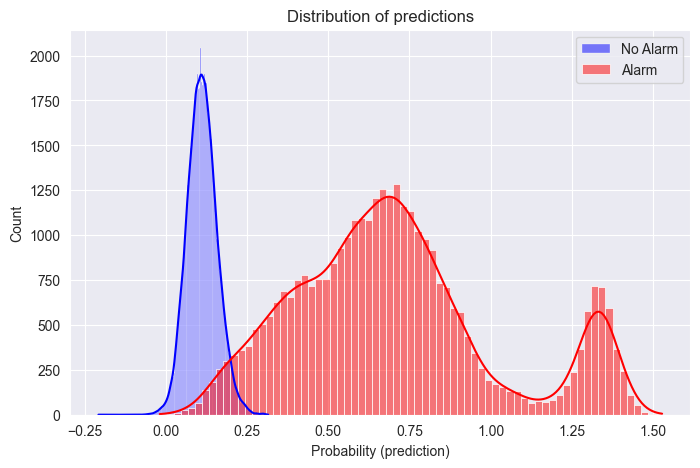

In [75]:
y_pred_last = linear_model.predict(X_test)

plt.figure(figsize=(8, 5))
sns.histplot(y_pred_last[y_test_reg == 0], color='blue', label='No Alarm', kde=True)
sns.histplot(y_pred_last[y_test_reg == 1], color='red', label='Alarm', kde=True)
plt.title("Distribution of predictions")
plt.xlabel("Probability (prediction)")
plt.legend()
plt.show()

/var/folders/v9/1s1m0gfd7pj_mh9x13f5hvdc0000gn/T/ipykernel_8920/3389354313.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='coefficient', y='feature', palette='coolwarm')


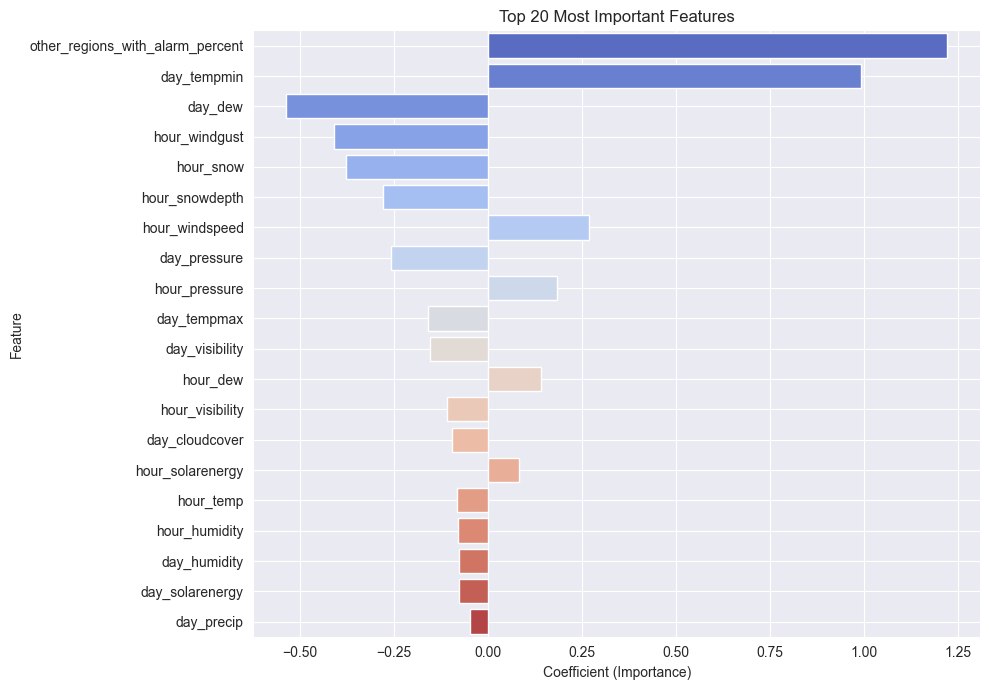

In [76]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': linear_model.coef_
})

top20 = feature_importance.reindex(feature_importance.coefficient.abs().sort_values(ascending=False).index).head(20)

plt.figure(figsize=(10, 7))
sns.barplot(data=top20, x='coefficient', y='feature', palette='coolwarm')
plt.title('Top 20 Most Important Features')
plt.xlabel('Coefficient (Importance)')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

## Logistic Regression

In [77]:
logistic_model = LogisticRegression()

logistic_accuracy = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_bin, y_test_bin = y_bin.iloc[train_index], y_bin.iloc[test_index]
    
    logistic_model.fit(X_train, y_train_bin)
    
    y_pred_bin = logistic_model.predict(X_test)
    
    logistic_accuracy.append(logistic_model.score(X_test, y_test_bin))

print("\nLogistic Regression Evaluation:")
print(f"Average Accuracy: {np.mean(logistic_accuracy):.2f}")

/Users/renatagomon/PycharmProjects/alarm_model/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/renatagomon/PycharmProjects/alarm_model/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s


Logistic Regression Evaluation:
Average Accuracy: 0.99


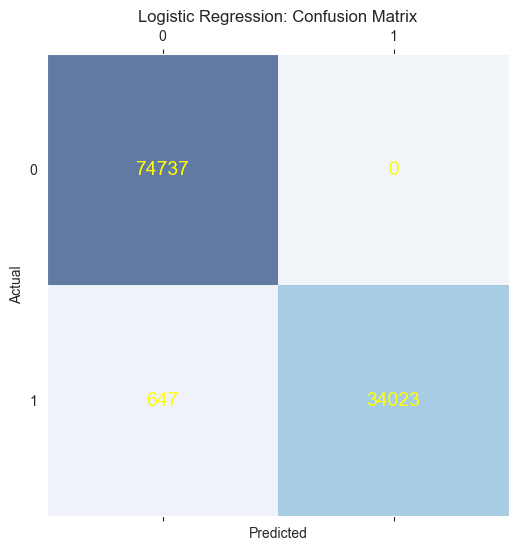

In [78]:
y_pred_last_bin = logistic_model.predict(X_test)
c_matrix = confusion_matrix(y_test_bin, y_pred_last_bin)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(c_matrix, cmap='Blues', alpha=0.6)
for (i, j), val in np.ndenumerate(c_matrix):
    ax.text(j, i, val, ha='center', va='center', color='yellow', fontsize=14)
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

/var/folders/v9/1s1m0gfd7pj_mh9x13f5hvdc0000gn/T/ipykernel_8920/702333191.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='coefficient', y='feature', palette='coolwarm')


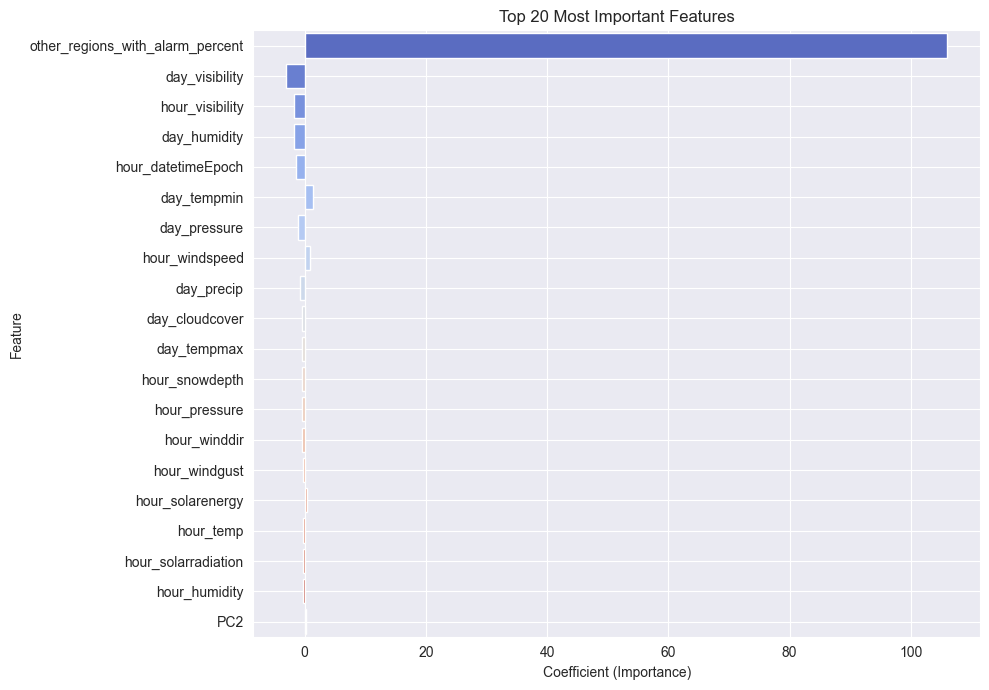

In [79]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': logistic_model.coef_[0]
})

top20 = feature_importance.reindex(feature_importance.coefficient.abs().sort_values(ascending=False).index).head(20)

plt.figure(figsize=(10, 7))
sns.barplot(data=top20, x='coefficient', y='feature', palette='coolwarm')
plt.title('Top 20 Most Important Features')
plt.xlabel('Coefficient (Importance)')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()